# Lab Assignment 06
The objective of this lab assignment is to build and evaluate classification models to predict customer churn given information from customers of a telephone company (`data_lab_06.csv`).

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Each task and question is worth **0.5 points** (out of **10 points**).

#### Submission:
This assignment is due **Monday, November 18, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Decision Trees

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
# Load dataset and display the first five rows
data = pd.read_csv('data_lab_06.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 14): Partition the dataset into training set and test set.**
_Hint:_ Use 75% of the data for training and 25% for testing and set parameter random_state to 0.

In [46]:
predicted_vals = data['Churn']
predictor_vals = data.drop(['Churn'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictor_vals, 
                                                    predicted_vals, 
                                                   train_size = .75,
                                                   test_size = 0.25,
                                                   random_state = 0)

In [47]:
# Show the dimensionality of the training set and the test set
# The training set should have 2499 observations and the test set should have 834 observations
print(x_train.shape)
print(x_test.shape)

(2499, 17)
(834, 17)


**Task 02 (of 14): Standardize the training set and test set.**
_Hint:_ Compute the mean and standard deviation using only the training set and then apply this transformation on the training set and test set.

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Task 03 (of 14): Build a decision tree classifier to classify customers as churnend/non-churned.**
_Hint:_ Use entropy as the split criterion.

In [65]:
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 242,  4,  1.37790751e+00, 0.60293799, 2499, 2.499e+03)
 (  2, 203, 16,  1.47932553e+00, 0.4991475 , 2278, 2.278e+03)
 (  3, 190,  1,  1.39084876e+00, 0.37934172, 2105, 2.105e+03)
 (  4, 139,  6,  7.91448593e-01, 0.26832186, 1921, 1.921e+03)
 (  5,   6, 12, -1.40246248e+00, 0.1779243 , 1681, 1.681e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  124, 1.240e+02)
 (  7,   8, 10, -1.40125608e+00, 0.18885385, 1557, 1.557e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 (  9,  28,  9, -6.43147230e-01, 0.18567934, 1556, 1.556e+03)
 ( 10,  27,  9, -1.12710643e+00, 0.09482908,  411, 4.110e+02)
 ( 11,  26, 15,  5.71940318e-02, 0.16417121,  207, 2.070e+02)
 ( 12,  23, 15, -2.16688029e-03, 0.29071587,   98, 9.800e+01)
 ( 13,  18,  3,  1.93759680e+00, 0.20390588,   94, 9.400e+01)
 ( 14,  17,  0, -1.88109088e+00, 0.09140162,   86, 8.600e+01)
 ( 15,  16,  9, -1.78004909e+00, 1.        ,    2, 2.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 ( -1,  

287

**Question 01 (of 06): How many nodes are in the tree? Which variable was selected to split the root node of the tree? What can you conclude from observing the structure of the tree?**

**Answer:** There are 287 nodes. The root node was split on Total Day Minutes. The conclusion made about this is that the initial splitting greedily splits the first root node from 2499 to 2278 and remainder, meaning that this is a greedy approach. Because of this, we can assert that Total Day Minutes is a more relevant and decisive splitting attribute than the remainder of the attributes.

**Task 04 (of 14): Predict the class labels for the test set using the decision tree classifier and plot the corresponding confusion matrix.**

In [67]:
y_pred = classifier.predict(x_test_scaled)

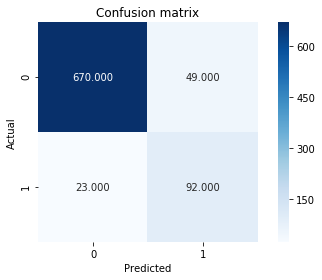

In [68]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 05 (of 14): Compute evaluation metrics for the decision tree classifier.**

In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None )
print([accuracy, error, precision, recall, F1_score])

[0.9136690647482014, 0.08633093525179858, array([0.96681097, 0.65248227]), array([0.93184979, 0.8       ]), array([0.9490085, 0.71875  ])]


**Question 02 (of 06): What can you conclude about the performance of the decision tree classifier?**

**Answer:** The accuracy is high and the error is low. For the first metric of 0, the precision and recall are very high, as well as the f1 score. The f1 score performs very well, and so we can say the decision tree performs well. However, it is noted that this was run several times and the f1 score previously did not perform well. This is likely due to the variability of decision trees and so a random forest would be a more efficient check on the model.

### Part 2: k-Nearest Neighbors

**Task 06 (of 14): Build a k-nearest neighbors classifier to classify customers as churnend/non-churned.**
_Hint:_ Use _k=3_ as the number of nearest neighbors.

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

**Task 07 (of 14): Predict the class labels for the test set using the k-nearest neighbors classifier and plot the corresponding confusion matrix.**

In [28]:
y_pred = classifier.predict(x_test_scaled)

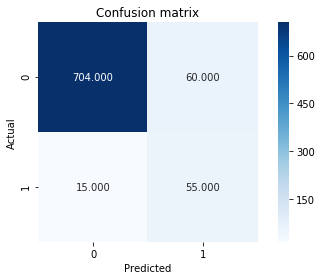

In [29]:
conf_matrix = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 08 (of 14): Compute evaluation metrics for the k-nearest neighbors classifier.**

In [30]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None )
print([accuracy, error, precision, recall, F1_score])

[0.9100719424460432, 0.08992805755395683, array([0.92146597, 0.78571429]), array([0.97913769, 0.47826087]), array([0.94942684, 0.59459459])]


**Question 03 (of 06): What can you conclude about the performance of the k-nearest neighbors classifier?**

**Answer:** The k-nearest neighbors model performs very accurately with low error. Overall, this performs worwse than our single decision tree model. There is room for improvement on our recall, which does lower our f1 score.

### Part 3: Naive Bayes

**Task 09 (of 14): Build a Naive Bayes classifier to classify customers as churnend/non-churned.**

In [34]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled, y_train)

GaussianNB(priors=None)

In [74]:
x_train_scaled.shape
y_train

427     0
1656    0
1042    0
1867    0
346     0
       ..
835     0
3264    0
1653    1
2607    0
2732    1
Name: Churn, Length: 2499, dtype: int64

**Task 10 (of 14): Predict the class labels for the test set using the Naive Bayes classifier and plot the corresponding confusion matrix.**

In [35]:
y_pred = classifier.predict(x_test_scaled)

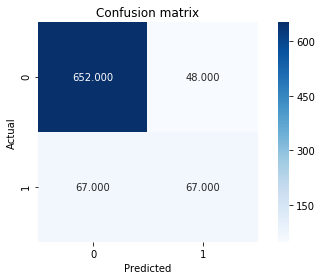

In [36]:
conf_matrix = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 11 (of 14): Compute evaluation metrics for the Naive Bayes classifier.**

In [37]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None )
print([accuracy, error, precision, recall, F1_score])

[0.8621103117505995, 0.1378896882494005, array([0.93142857, 0.5       ]), array([0.90681502, 0.5826087 ]), array([0.91895701, 0.53815261])]


**Question 04 (of 06): What can you conclude about the performance of the Naive Bayes classifier?**

**Answer:** The Naive Bayes classifier is less accurate than other models, but still performs very well. It still boasts a good precision, recall, and f1 score. The f1 score performs worse than our decision tree and k nearest neighbors models.

### Part 4: Support Vector Machines

**Task 12 (of 14): Build an SVM classifier to classify customers as churnend/non-churned.**
_Hint:_ Use _rbf_ (radial basis function) as the kernel function.

In [38]:
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Task 13 (of 14): Predict the class labels for the test set using the SVM classifier and plot the corresponding confusion matrix.**

In [39]:
y_pred = classifier.predict(x_test_scaled)

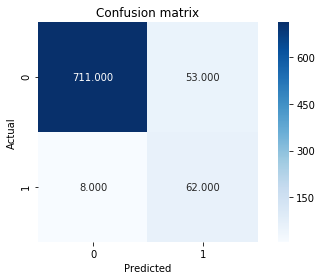

In [40]:
conf_matrix = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

**Task 14 (of 14): Compute evaluation metrics for the SVM classifier.**

In [41]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None )
print([accuracy, error, precision, recall, F1_score])

[0.9268585131894485, 0.07314148681055155, array([0.93062827, 0.88571429]), array([0.98887344, 0.53913043]), array([0.95886716, 0.67027027])]


**Question 05 (of 06): What can you conclude about the performance of the SVM classifier?**

**Answer:** The SVM classifier has very high accuracy, with also very high precision, recall and f1 score in comparison to the other classifiers. This is showing that of the classifiers chosen to test, the SVM has very promising results. 

**Question 06 (of 06): Which of the classifiers had the best performance?**

**Answer:** The Decision Tree has the best classification performance score. The second is the rbh SVM. However, it should be noted that the decision tree has high variability. Previously the decision tree had significantly worse results. I would have liked to test a random forest against the SVM to confirm if it was better or not.